# Modeling

In [1]:
import sys

print(sys.version)  # Verify Python version is between 3.11-3.12

3.12.12 (main, Jan 14 2026, 23:36:32) [Clang 21.1.4 ]


## Building the Model

In [2]:
folder_path = "/Users/johnydc/Downloads/Tigers/"
processed_data = folder_path + "data/processed/"

In [3]:
import numpy as np
import pandas as pd

X_train = np.load(processed_data + 'train:val:test/X_train.npy')
y_train = np.load(processed_data + 'train:val:test/y_train.npy')
X_val = np.load(processed_data + 'train:val:test/X_val.npy')
y_val = np.load(processed_data + 'train:val:test/y_val.npy')
X_test = np.load(processed_data + 'train:val:test/X_test.npy')

X_train_val_indices = np.load(processed_data + 'train:val:test/X_train_val_indices.npy')
y_train_val_indices = np.load(processed_data + 'train:val:test/y_train_val_indices.npy')
train_idx = np.load(processed_data + 'train:val:test/train_idx.npy')
val_idx = np.load(processed_data + 'train:val:test/val_idx.npy')

# Converting our data to floats for the model input 
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test = X_test.astype(np.float32)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshaping the data into 2D for the scaler; then reshaping back to its original shape for the model
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Masking
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Masking(mask_value=0.0),
    LSTM(8),
    Dense(8),
    Dense(1, 'linear')
])

In [6]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_val_scaled, y_val))

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 304.8128 - val_loss: 171.2124
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195.4422 - val_loss: 90.0372
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.8367 - val_loss: 55.1759
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.2409 - val_loss: 56.0656
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105.7771 - val_loss: 55.3452
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.7051 - val_loss: 44.5386
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.6271 - val_loss: 40.2516
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.4935 - val_loss: 38.6902
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.6458 - val_loss: 40.2396
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.7576 - val_loss: 38.1483
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.3379 - val_loss: 37.1550
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.6867 - 

In [7]:
y_pred = model.predict(X_val_scaled)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred)
d = {"Actual Home Runs": y_val, "Predicted Home Runs": y_pred}
comparison = pd.DataFrame(data=d)
comparison

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


,Actual Home Runs,Predicted Home Runs
0,32.0,18.0
1,8.0,9.0
2,9.0,10.0
3,27.0,26.0
4,25.0,25.0
5,21.0,26.0
6,13.0,19.0
7,9.0,14.0
8,30.0,26.0
9,12.0,10.0


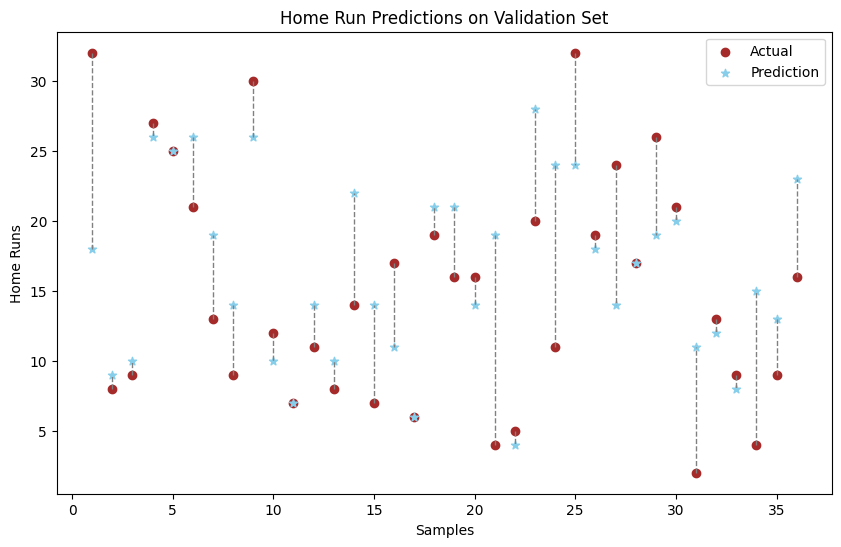

In [8]:
import matplotlib.pyplot as plt

val_samples = np.arange(1, len(y_val)+1)

plt.figure(figsize=(10, 6))
plt.title("Home Run Predictions on Validation Set")
plt.xlabel("Samples")
plt.ylabel("Home Runs")

plt.scatter(val_samples, y_val, color="brown", label="Actual")
plt.scatter(val_samples, y_pred, color="skyblue", marker="*", label="Prediction")

# Plot the residual line between the two data points
for x, y_true, y_hat in zip(val_samples, y_val, y_pred):
    plt.plot([x, x], [y_true, y_hat], color='gray', linestyle='--', linewidth=1)
    
plt.legend()
plt.show()

In [9]:
tigers = ['Javier Báez', 'Kerry Carpenter', 'Dillon Dingler', 'Riley Greene', 'Colt Keith',
         'Justyn Henry Malloy', 'Zach Mckinstry', 'Parker Meadows', 'Wenceel Pérez',
         'Jake Rogers', 'Spencer Torkelson', 'Gleyber Torres', 'Matt Vierling']

tigers_pred = model.predict(X_test_scaled)
tigers_pred = tigers_pred.flatten()
tigers_pred = np.round(tigers_pred)

dtown = {"Detroit Tiger": tigers, "Predicted Home Runs": tigers_pred}
projections = pd.DataFrame(data=dtown)
projections

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,Detroit Tiger,Predicted Home Runs
0,Javier Báez,11.0
1,Kerry Carpenter,21.0
2,Dillon Dingler,18.0
3,Riley Greene,27.0
4,Colt Keith,16.0
5,Justyn Henry Malloy,12.0
6,Zach Mckinstry,12.0
7,Parker Meadows,8.0
8,Wenceel Pérez,14.0
9,Jake Rogers,9.0
